In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from collections import Counter
from sklearn.datasets import make_classification

A cluster is a group of data points that are similar to each other in some way. In machine learning and data mining, clustering algorithms are used to identify these groups within a dataset.

In [5]:
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

weight = 0.99 means one category will be 99 times more datapoints than the other category (to create imbalance dataset)

In [6]:
X,y

(array([[ 1.87991016, -1.4850347 ],
        [ 0.37708311, -2.23858488],
        [ 1.35431163, -2.66463822],
        ...,
        [ 0.99509904, -0.54192355],
        [ 1.75859359, -1.54961188],
        [ 0.79770543, -1.99467372]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [7]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [13]:
df = pd.DataFrame(X)

<Axes: >

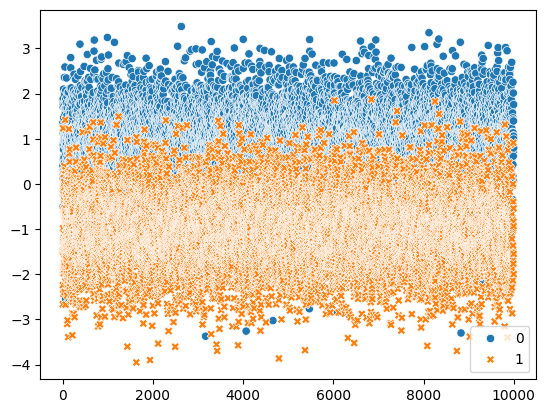

In [17]:
sns.scatterplot(df)
# we can see it is a completely imbalanced dataset


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']



In [20]:
# class weight can be either dictionary or 'balanced', balanced we can set when we have balanced data
# in terms of our output feature, here we have imbalanced dataset so we will use dictionary
class_weight =  [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

1. List Comprehension: The code uses list comprehension to efficiently create the list of dictionaries.


2.Outer Loop (for w in [1,10,50,100]): This loop iterates over the values 1, 10, 50, and 100, assigning each value to the variable w.

3. Inner Loop (for y in [1,10,50,100]): For each value of w, this loop iterates over the same values 1, 10, 50, and 100, assigning each value to the variable y.


4. Dictionary Creation: Inside both loops, a dictionary is created with two keys: 0 and 1. The values associated with these keys are w and y, respectively. This dictionary represents a specific class weight configuration where the class 0 has a weight of w, and the class 1 has a weight of y.


5.List Appending: Each created dictionary is appended to the class_weight list.

In [22]:

class_weight
# these are all combinations, it means give the specific weight to w and y according to their numbers


[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [23]:
params =  dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [24]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [26]:
grid.fit(X_train,y_train)

/Users/user/Desktop/a/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/a/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/a/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/a/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/a/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/user/Desktop/a/venv/lib/python3.10/sit

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [27]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [28]:
y_pred = grid.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(y_test,y_pred)
print("score: ",score)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

score:  0.9916
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2476
           1       0.59      0.42      0.49        24

    accuracy                           0.99      2500
   macro avg       0.79      0.71      0.74      2500
weighted avg       0.99      0.99      0.99      2500

[[2469    7]
 [  14   10]]
